<ipython-input-1-be328cdd8f03>:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query1, conn)


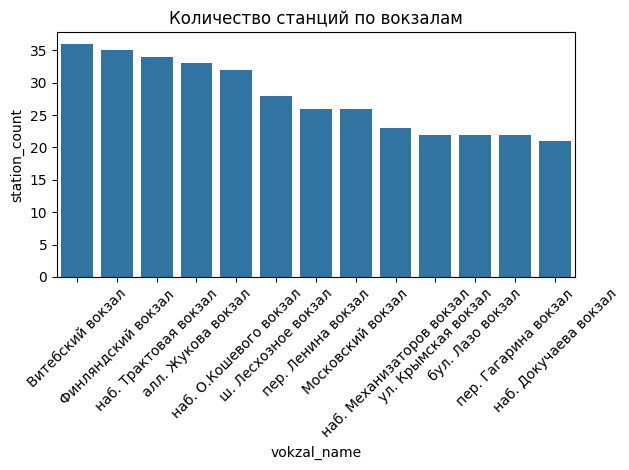

In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Подключение к базе
conn = psycopg2.connect(
    dbname='dbstud',
    user='bk_465304_2025',
    password='bk_465304',
    host='postgrepro.dc-edu.ru',
    port='5432'
)
cur = conn.cursor()

# Запрос
query1 = """
SELECT v.name AS vokzal_name, COUNT(s.station_id) AS station_count
FROM vokzals v
LEFT JOIN stations s ON v.vokzal_id = s.vokzal_id
GROUP BY v.name
ORDER BY station_count DESC;
"""
df1 = pd.read_sql(query1, conn)

# Визуализация
sns.barplot(data=df1, x='vokzal_name', y='station_count')
plt.title('Количество станций по вокзалам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-2-127f21290730>:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query2, conn)


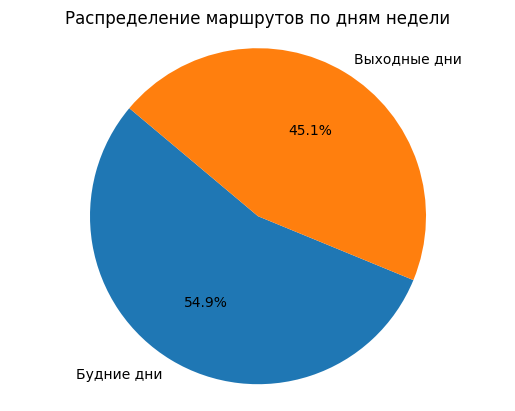

In [2]:
query2 = """
SELECT
    SUM(CASE WHEN weekday_only THEN 1 ELSE 0 END) AS weekday_routes,
    SUM(CASE WHEN weekend_only THEN 1 ELSE 0 END) AS weekend_routes
FROM routes;
"""
df2 = pd.read_sql(query2, conn)

# Подготовка данных
labels = ['Будние дни', 'Выходные дни']
sizes = [df2['weekday_routes'][0], df2['weekend_routes'][0]]

# Визуализация
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Распределение маршрутов по дням недели')
plt.axis('equal')
plt.show()


<ipython-input-3-0e8c1bbf985d>:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql(query3, conn)


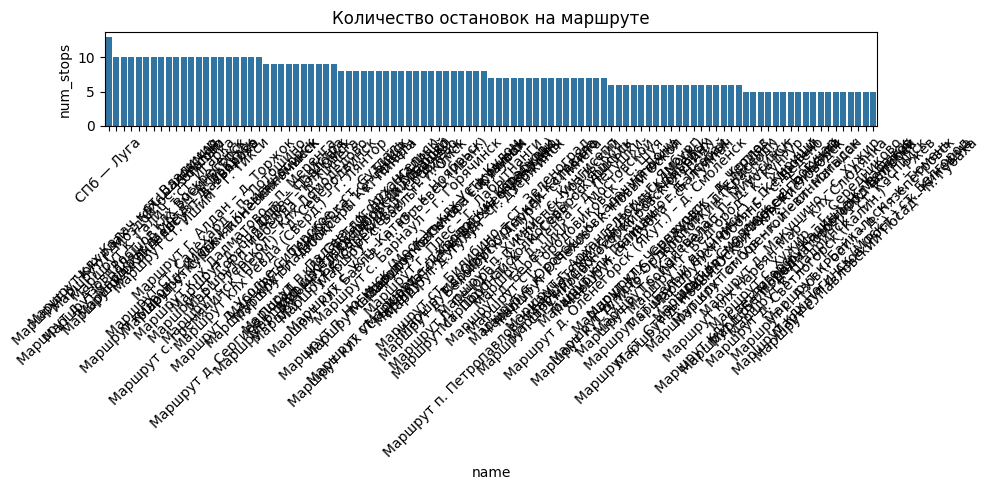

In [3]:
query3 = """
SELECT r.name, COUNT(rs.station_id) AS num_stops
FROM routes r
JOIN route_stations rs ON r.route_id = rs.route_id
GROUP BY r.name
ORDER BY num_stops DESC;
"""
df3 = pd.read_sql(query3, conn)

# Визуализация
plt.figure(figsize=(10,5))
sns.barplot(data=df3, x='name', y='num_stops')
plt.title('Количество остановок на маршруте')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-5-79378a038b91>:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df5 = pd.read_sql(query5, conn)


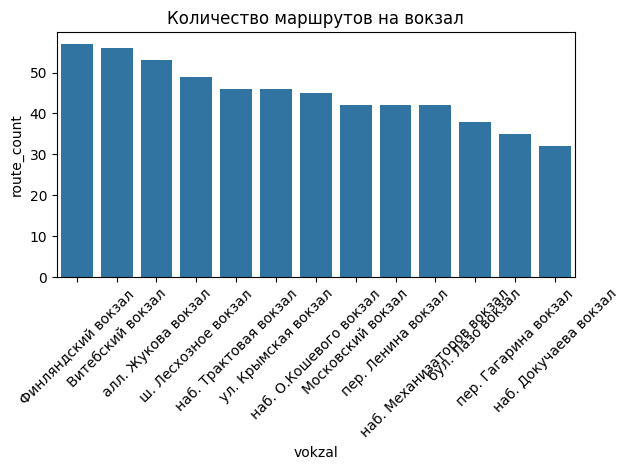

In [5]:
query5 = """
SELECT v.name AS vokzal, COUNT(DISTINCT r.route_id) AS route_count
FROM vokzals v
JOIN stations s ON v.vokzal_id = s.vokzal_id
JOIN route_stations rs ON s.station_id = rs.station_id
JOIN routes r ON r.route_id = rs.route_id
GROUP BY v.name
ORDER BY route_count DESC;
"""
df5 = pd.read_sql(query5, conn)

# Визуализация
sns.barplot(data=df5, x='vokzal', y='route_count')
plt.title('Количество маршрутов на вокзал')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
